# Assignment 1
### Understanding Uncertainty
### Due 9/5
### Anna Li

1. Create a new public repo on Github under your account. Include a readme file.
2. Clone it to your machine. Put this file into that repo.
3. Use the following function to download the example data for the course:

In [1]:
def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request, zipfile, os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    else:
        print("Download file already exists")
        
    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    else:
        print("Data directory already exists")

download_data()

Download complete
Extracting data files...
Data extracted


4. Open one of the datasets using Pandas:
    1. `ames_prices.csv`: Housing characteristics and prices
    2. `college_completion.csv`: Public, nonprofit, and for-profit educational institutions, graduation rates, and financial aid
    3. `ForeignGifts_edu.csv`: Monetary and in-kind transfers from foreign entities to U.S. educational institutions
    4. `iowa.csv`: Liquor sales in Iowa, at the transaction level
    5. `metabric.csv`: Cancer patient and outcome data
    6. `mn_police_use_of_force.csv`: Records of physical altercations between Minnessota police and private citizens
    7. `nhanes_data_17_18.csv`: National Health and Nutrition Examination Survey
    8. `tuna.csv`: Yellowfin Tuna Genome (I don't recommend this one; it's just a sequence of G, C, A, T )
    9. `va_procurement.csv`: Public spending by the state of Virginia

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/college_completion.csv')
pd.set_option('display.max_columns', None)
df.head()


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,lat_y,site,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,vsa_year,vsa_grad_after4_first,vsa_grad_elsewhere_after4_first,vsa_enroll_after4_first,vsa_enroll_elsewhere_after4_first,vsa_grad_after6_first,vsa_grad_elsewhere_after6_first,vsa_enroll_after6_first,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,34.783368,www.aamu.edu/,4051,14.2,18.8,21.5,105331,75743,66436,90,93.8,3906,33,823.0,0.0,7142.0,72.0,NaN,NaN,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,82.8,89.0,2010.0,14.7,2.0,36.5,16.1,33.0,5.3,12.5,14.6,15.7,1.5,40.9,17.2,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,33.502230,www.uab.edu,11502,20.9,18.8,21.5,136546,75743,66436,97,72.7,10032,67,1146.0,84.0,6088.0,50.0,24136.0,93.0,29.4,67.0,53.5,66.0,35.1,39.0,80.2,70.0,92.4,98.0,2011.0,22.3,2.9,34.2,19.2,42.6,10.5,7.9,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,32.362609,www.amridgeuniversity.edu,322,29.9,17.8,22.5,58414,92268,101725,30,62.7,294,12,NaN,NaN,2540.0,1.0,302.0,1.0,0.0,0.0,66.7,72.0,68.4,91.0,37.5,2.0,67.2,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,34.722818,www.uah.edu,5696,20.9,18.8,21.5,64418,75743,66436,61,74.4,5000,40,1180.0,89.0,6647.0,63.0,11502.0,81.0,16.5,34.0,48.4,54.0,32.8,32.0,81.0,72.0,65.5,56.0,2010.0,12.8,4.7,42.8,18.3,43.0,14.5,10.2,11.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,32.364317,www.alasu.edu/email/index.aspx,5356,11.6,18.8,21.5,132407,75743,66436,96,91.0,5035,41,830.0,1.0,7256.0,74.0,13202.0,84.0,8.8,11.0,25.2,9.0,82.7,100.0,62.2,15.0,67.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


5. Pick two or three variables and briefly analyze them
    - Is it a categorical or numeric variable?
    - How many missing values are there? (`df['var'].isna()` and `np.sum()`)
    - If categorical, tabulate the values (`df['var'].value_counts()`) and if numeric, get a summary (`df['var'].describe()`)

level
4-year    2339
2-year    1459
Name: count, dtype: int64

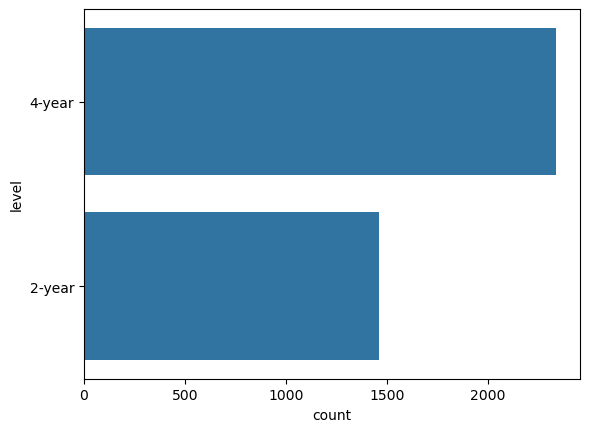

In [ ]:
# Level is a categorical variable, whether its a 2-year or 4-year institution
sns.countplot(df['level'])
np.sum(df['level'].isna()) # There are no missing values for this variable
df['level'].value_counts()

count     3467.000000
mean       658.306028
std        961.782580
min          1.000000
25%        131.000000
50%        356.000000
75%        782.500000
max      16229.000000
Name: cohort_size, dtype: float64

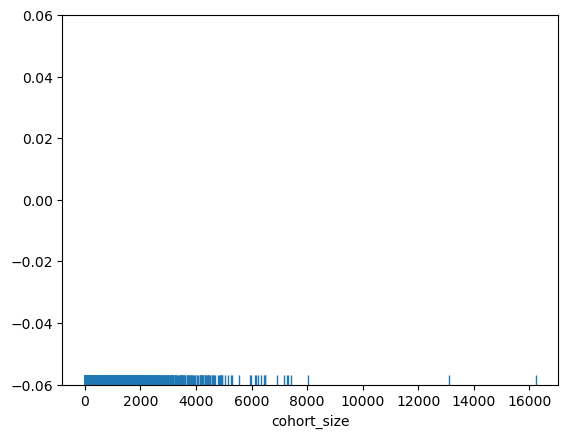

In [ ]:
# Cohort size is a numeric variable
sns.rugplot(df['cohort_size'])
np.sum(df['cohort_size'].isna()) # There are 331 missing values for this variable
df['cohort_size'].describe()

6. What are some questions and prediction tools you could create using these data? Who would the stakeholder be for that prediction tool? What practical or ethical questions would it create? What other data would you want, that are not available in your data?

Can we make a tool that predicts graduation rate based on variety of factors -- public vs. for-profit, amount of financial aid received, cohort size, etc.? Do public educational institutions have higher graduation rates than for-profit educational institutions? Do schools that offer larger financial aid packages have higher graduation rates? If we want to create a prediction tool at the student-level, to see if we can predict graduation rate for a student at a given school but also based on certain personal characteristics, this raises ethical questions in collecting data to train such a tool, since there's potentially personally identifiable or sensitive information at play there -- also the risk that it perpetuates certain historical biases / barriers to access, especially for students from marginalized populations. 

7. Commit your work to the repo (`git commit -am 'Finish assignment'` at the command line, or use the Git panel in VS Code). Push your work back to Github and submit the link on Canvas in the assignment tab.